# DETECCIÓN DE BOTS

## Paso 1: Análisis Exploratorio de Datos (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
df = pd.read_csv('bots_vs_users.csv')

# Exploración inicial
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print(f"\nPrimeras 5 filas:")
print(df.head())
print(f"\nInformación de columnas:")
print(df.info())
print(f"\nEstadísticas descriptivas:")
print(df.describe())
print(f"\nValores nulos por columna:")
print(df.isnull().sum())
print(f"\nDistribución del target:")
print(df['target'].value_counts())

=== INFORMACIÓN DEL DATASET ===
Dimensiones: (5874, 60)

Primeras 5 filas:
  has_domain has_birth_date has_photo can_post_on_wall can_send_message  \
0        1.0            1.0       0.0              0.0              0.0   
1        1.0            1.0       0.0              0.0              0.0   
2        1.0            1.0       0.0              0.0              0.0   
3        1.0            1.0       0.0              0.0              0.0   
4        1.0            1.0       0.0              0.0              0.0   

  has_website gender has_short_name has_first_name has_last_name  ...  \
0         0.0    1.0            1.0            1.0           1.0  ...   
1         0.0    1.0            1.0            1.0           1.0  ...   
2         0.0    1.0            1.0            1.0           1.0  ...   
3         0.0    1.0            1.0            1.0           1.0  ...   
4         0.0    1.0            1.0            1.0           1.0  ...   

  ads_ratio avg_views  posting_freq

In [3]:
df.isna().mean() # Evaluating the % of missing values in every column

has_domain                    0.000000
has_birth_date                0.000000
has_photo                     0.000000
can_post_on_wall              0.000000
can_send_message              0.000000
has_website                   0.000000
gender                        0.000000
has_short_name                0.000000
has_first_name                0.000000
has_last_name                 0.000000
access_to_closed_profile      0.000000
is_profile_closed             0.000000
target                        0.000000
has_nickname                  0.000000
has_maiden_name               0.000000
has_mobile                    0.000000
all_posts_visible             0.000000
audio_available               0.000000
has_interests                 0.000000
has_books                     0.000000
has_tv                        0.000000
has_quotes                    0.000000
has_about                     0.000000
has_games                     0.000000
has_movies                    0.000000
has_activities           

In [4]:
# Deleting columns with less than 50% of useful data.
df_v1 = df.loc[:, df.isna().mean() <= 0.5] 

# Separating features to assess unknown values
subscribers_target = df_v1[['target','subscribers_count']]
other_features = df_v1 = df_v1.drop(['target','subscribers_count'], axis=1)

# Replacing unknown values with a placeholder and NaN 
other_features = other_features.replace('Unknown', 3)
df_v2 = pd.concat([subscribers_target, other_features], axis=1)
df_v2 = df_v2.replace('Unknown', np.nan) #Replacing unknown in SUBSCRIBERS_COUNT with NaN 

df_v2['city'] = df_v2['city'].apply(lambda x: 0 if x == 3 else 1) # Replacing 3 with 0 in City for better understanding.
df_v3 = df_v2.apply(lambda col: col.fillna(col.mode()[0])) # Filling Unknown values in SUBSCRIBERS_COUNT with the MODE.
df_final = df_v3.apply(lambda col: col.astype(float).astype(int)) # Turning all columns into int64 for training purposes
df_final.shape

(5874, 46)

# Statistical Analysis
This step seeks to understand the interaction and correlation among the features. Here it's possible to check multicolinearity, plot visulizations and highlight key points.

=== RESUMEN ESTADÍSTICO DE CORRELACIONES ===
Total de features analizadas: 45

Correlación máxima: 1.0000
Correlación mínima: -0.7776
Correlación promedio: 0.4090

🔝 TOP 10 CORRELACIONES POSITIVAS (predictores de BOT):
  has_status: 0.8528
  all_posts_visible: 0.8302
  audio_available: 0.8228
  is_blacklisted: 0.8028
  is_confirmed: 0.8028
  is_verified: 0.7973
  can_add_as_friend: 0.7950
  has_nickname: 0.7916
  can_invite_to_group: 0.7852
  has_mobile: 0.7812

🔻 TOP 10 CORRELACIONES NEGATIVAS (predictores de HUMANO):
  has_short_name: -0.0480
  has_first_name: -0.0480
  can_post_on_wall: -0.1457
  has_birth_date: -0.2403
  subscribers_count: -0.2945
  is_profile_closed: -0.3177
  has_website: -0.4697
  can_send_message: -0.5913
  city: -0.6267
  has_photo: -0.7776


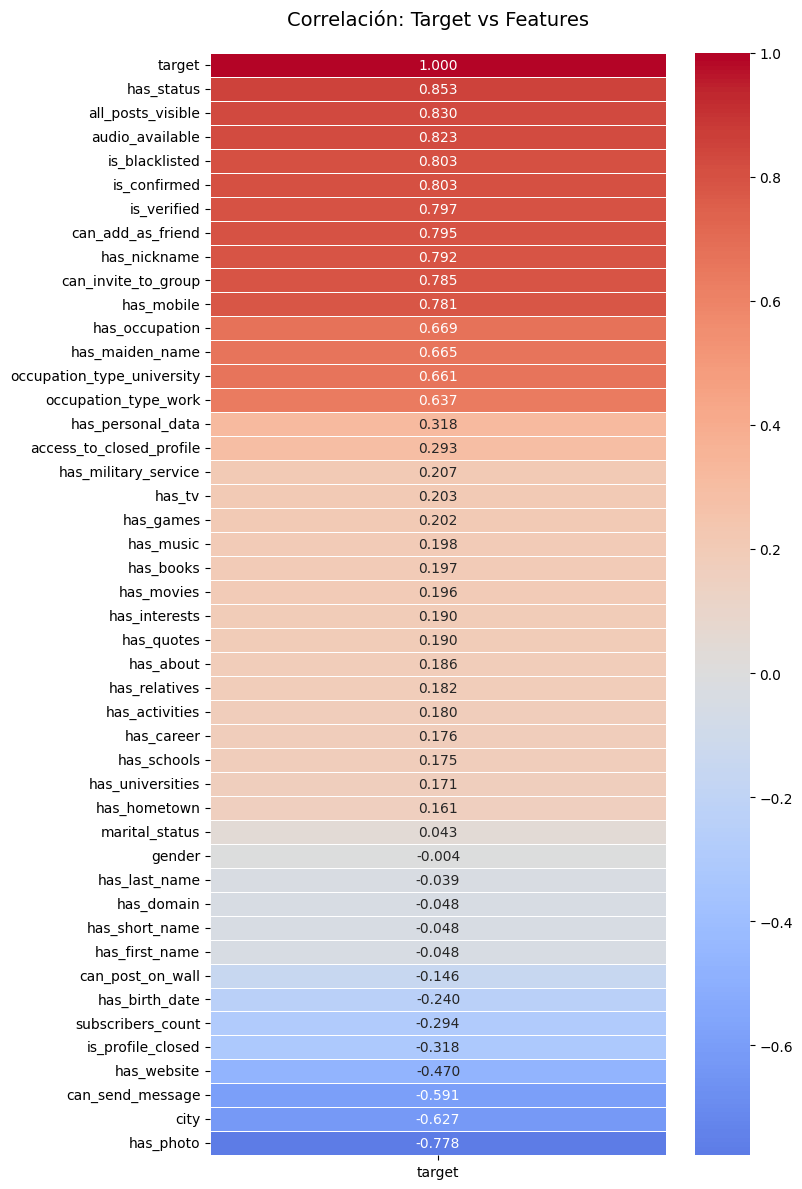


📊 ANÁLISIS DE FEATURES MÁS RELEVANTES:

Features con correlación > 0.2 (fuertes predictores de BOTS):
  ✅ has_status: 0.8528
  ✅ all_posts_visible: 0.8302
  ✅ audio_available: 0.8228
  ✅ is_blacklisted: 0.8028
  ✅ is_confirmed: 0.8028
  ✅ is_verified: 0.7973
  ✅ can_add_as_friend: 0.7950
  ✅ has_nickname: 0.7916
  ✅ can_invite_to_group: 0.7852
  ✅ has_mobile: 0.7812
  ✅ has_occupation: 0.6691
  ✅ has_maiden_name: 0.6645
  ✅ occupation_type_university: 0.6611
  ✅ occupation_type_work: 0.6369
  ✅ has_personal_data: 0.3176
  ✅ access_to_closed_profile: 0.2931
  ✅ has_military_service: 0.2066
  ✅ has_tv: 0.2032
  ✅ has_games: 0.2015

Features con correlación < -0.2 (fuertes predictores de HUMANOS):
  ✅ has_birth_date: -0.2403
  ✅ subscribers_count: -0.2945
  ✅ is_profile_closed: -0.3177
  ✅ has_website: -0.4697
  ✅ can_send_message: -0.5913
  ✅ city: -0.6267
  ✅ has_photo: -0.7776

⚠️  Features con correlación < |0.05| (poco predictivos):
  marital_status: 0.0429
  gender: -0.0039
  has_l

In [6]:
# Ejecutando el análisis de correlación
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_final está ya procesado según tu equipo
# Calculamos las correlaciones
corr = df_final.corr()
target_corr = corr[['target']].sort_values(by='target', ascending=False)

print("=== RESUMEN ESTADÍSTICO DE CORRELACIONES ===")
print(f"Total de features analizadas: {len(target_corr)-1}")
print(f"\nCorrelación máxima: {target_corr.iloc[0]['target']:.4f}")
print(f"Correlación mínima: {target_corr.iloc[-1]['target']:.4f}")
print(f"Correlación promedio: {target_corr['target'].abs().mean():.4f}")

# Mostrar las top 10 correlaciones positivas y negativas
print("\n🔝 TOP 10 CORRELACIONES POSITIVAS (predictores de BOT):")
top_positive = target_corr.head(11)  # Incluye target consigo mismo
for idx, row in top_positive.iterrows():
    if idx != 'target':  # Excluir la autocorrelación
        print(f"  {idx}: {row['target']:.4f}")

print("\n🔻 TOP 10 CORRELACIONES NEGATIVAS (predictores de HUMANO):")
top_negative = target_corr.tail(10)
for idx, row in top_negative.iterrows():
    print(f"  {idx}: {row['target']:.4f}")

# Crear el heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', linewidths=0.5)
plt.title("Correlación: Target vs Features", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Análisis adicional de features más relevantes
print("\n📊 ANÁLISIS DE FEATURES MÁS RELEVANTES:")
high_corr_pos = target_corr[(target_corr['target'] > 0.2) & (target_corr.index != 'target')]
high_corr_neg = target_corr[target_corr['target'] < -0.2]

if not high_corr_pos.empty:
    print(f"\nFeatures con correlación > 0.2 (fuertes predictores de BOTS):")
    for idx, row in high_corr_pos.iterrows():
        print(f"  ✅ {idx}: {row['target']:.4f}")

if not high_corr_neg.empty:
    print(f"\nFeatures con correlación < -0.2 (fuertes predictores de HUMANOS):")
    for idx, row in high_corr_neg.iterrows():
        print(f"  ✅ {idx}: {row['target']:.4f}")

# Features con baja correlación (potencialmente menos útiles)
low_corr = target_corr[(target_corr['target'].abs() < 0.05) & (target_corr.index != 'target')]
if not low_corr.empty:
    print(f"\n⚠️  Features con correlación < |0.05| (poco predictivos):")
    for idx, row in low_corr.head(10).iterrows():  # Mostrar solo top 10
        print(f"  {idx}: {row['target']:.4f}")

In [8]:
data = df_final
data.shape

(5874, 46)

In [9]:
#Detecting the % of outliers in the data
Q1 = data['subscribers_count'].quantile(0.25)
Q3 = data['subscribers_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data['subscribers_count'] < (Q1 - 1.5 * IQR)) | (data['subscribers_count'] > (Q3 + 1.5 * IQR))).sum()
print(f'{(outliers/data["subscribers_count"].count()*100):.2f}% of the data can be considered outliers. Therefore I decided to remove them.')

14.23% of the data can be considered outliers. Therefore I decided to remove them.


In [10]:
low_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

dataset = data[((data['subscribers_count'] >= low_limit) & (data['subscribers_count'] <= max_limit))]
dataset.shape

(5038, 46)

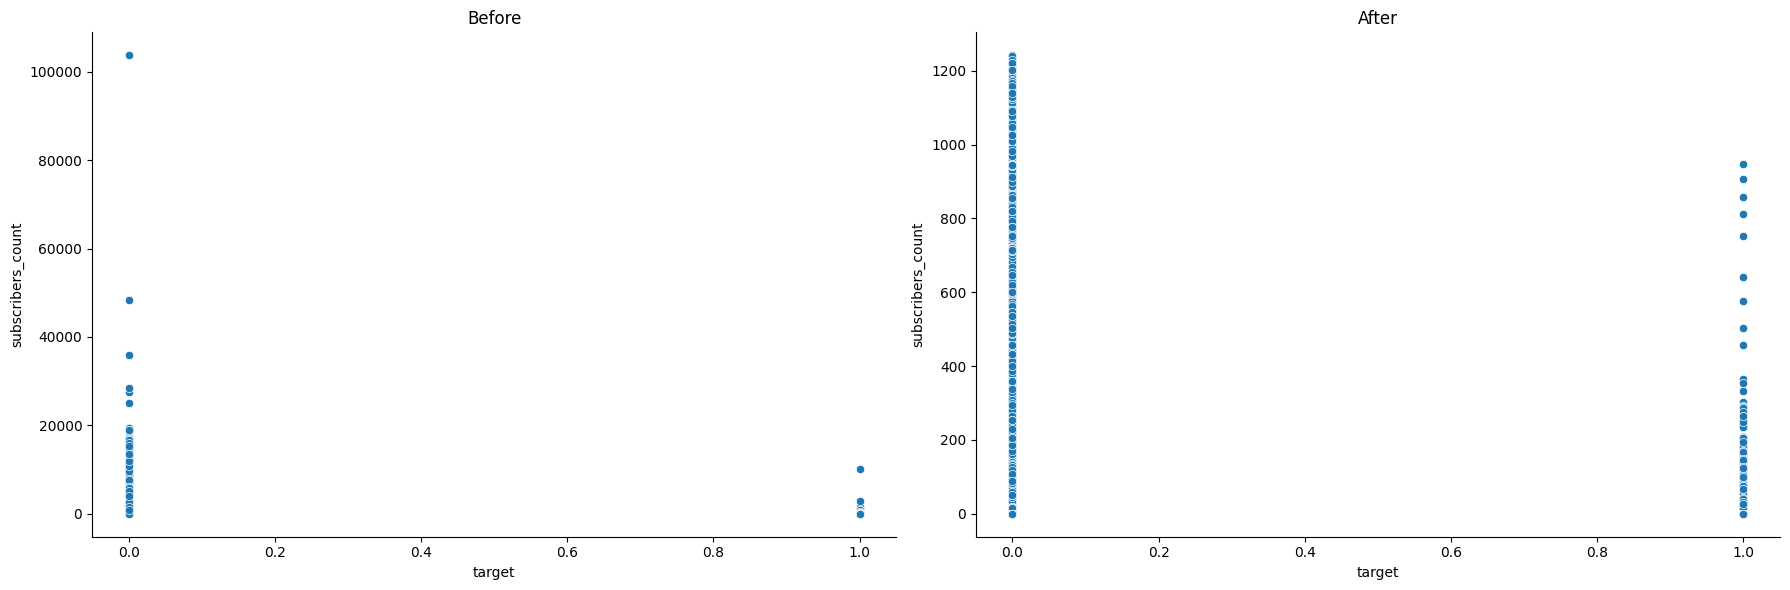

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0] = sns.scatterplot(data=data, x='target', y='subscribers_count', ax = ax[0])
ax[0].set_title("Before")
ax[1] = sns.scatterplot(data=dataset, x='target', y='subscribers_count', ax = ax[1])
ax[1].set_title("After")

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [ ]:
Analisis predictivo

# Data Preparation
To prepare the data to build and test the models. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # General metrics
from sklearn.preprocessing import MinMaxScaler # To scale features for better model performance
from sklearn.metrics import mean_squared_error # To assess how well the predctions match real data
from sklearn.metrics import confusion_matrix # To assess performance by comparing predictions against original data

# Testing Models
To test and validade base models, run metrics and confidence interval to evaluate model performance

In [12]:
# Splitting data

X = data.drop(['target'], axis=1)
y = data['target']

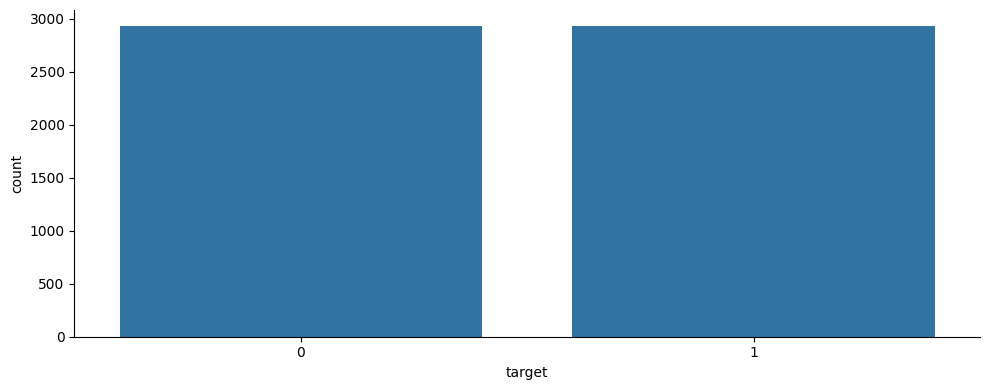

In [13]:
#Data is balanced, no need to apply any measures.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sns.countplot(x=y)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

### Escalado de datos

In [16]:
# Scaling train and test data for better performance

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Division Train/Test

In [17]:
# First split: separate out the test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
Creating base models

In [18]:
# Function to run metrics

def model_metrics(x):
    accuracy = accuracy_score(y_test, y_predict) * 100
    class_atrix = classification_report(y_test,y_predict)
    
    print(class_atrix)
    print("Accuracy: %.2f%%" % accuracy)

In [19]:
# Function to run confidence interval of the models

def validation_results(results):
  mean = results['test_score'].mean()
  std = results['test_score'].std()
  print("Average Accuracy: %.2f%%" % (mean * 100))
  print("Accuracy interval: [%.2f, %.2f]" % ((mean - 2 * std)*100, (mean + 2 * std) * 100))

In [20]:
# Base Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


# Dictionary of models
models = {
    "Dummy": DummyClassifier(strategy='stratified', random_state=42),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Dictionary to store results
results = {}

# Training and evaluating models
for name, model in models.items():
    if name == "Logistic Regression" or name == "K-Nearest Neighbors":
        model.fit(X_train, y_train) # Train the model
        y_pred = model.predict(X_test) # Make predictions
        accuracy = accuracy_score(y_test, y_pred) # Evaluate accuracy
        results[name] = round(accuracy*100,2) # Store results
    else:
        model.fit(X_train, y_train) # Train the model
        y_pred = model.predict(X_test) # Make predictions
        accuracy = accuracy_score(y_test, y_pred) # Evaluate accuracy
        results[name] = round(accuracy*100,2) # Store results
            
print(results)

{'Dummy': 51.33, 'Logistic Regression': 96.14, 'K-Nearest Neighbors': 96.37}


In [21]:
# Decision Tree

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

# Validations
cv = KFold(n_splits = 5, shuffle = True)
results = cross_validate(tree_model, X_train, y_train, cv = cv, return_train_score=False)
mse = mean_squared_error(y_test, y_predict)

# Print Metrics, Confusion Matrix and MSE
model_metrics(tree_model)
print("---")
validation_results(results)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       862
           1       0.96      0.96      0.96       901

    accuracy                           0.96      1763
   macro avg       0.96      0.96      0.96      1763
weighted avg       0.96      0.96      0.96      1763

Accuracy: 95.92%
---
Average Accuracy: 95.62%
Accuracy interval: [94.48, 96.76]


In [22]:
# Decision Tree Confusion Matrix

confusion_matrix(y_test, y_predict)

array([[823,  39],
       [ 33, 868]], dtype=int64)

# Despliegue

In [23]:
# 1. GUARDAR EL MODELO Y RECURSOS

In [24]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Guardar el modelo entrenado
joblib.dump(tree_model, 'bot_detection_model.pkl')

# Guardar el scaler (si usaste MinMaxScaler)
joblib.dump(scaler, 'scaler.pkl')

# Guardar los nombres de las columnas
feature_names = list(X.columns)
joblib.dump(feature_names, 'feature_names.pkl')

print("✅ Modelo y recursos guardados exitosamente")

✅ Modelo y recursos guardados exitosamente


### Verificacion de que los modelos se crearon

In [25]:
# Celda 2: Verificar archivos
import os

archivos = ['bot_detection_model.pkl', 'scaler.pkl', 'feature_names.pkl']
for archivo in archivos:
    if os.path.exists(archivo):
        tamaño = os.path.getsize(archivo) / 1024 / 1024  # Tamaño en MB
        print(f"✅ {archivo} - {tamaño:.2f} MB")
    else:
        print(f"❌ {archivo} - NO EXISTE")

✅ bot_detection_model.pkl - 0.00 MB
✅ scaler.pkl - 0.00 MB
✅ feature_names.pkl - 0.00 MB
